# Analyzing personal values from the ESS Survey (2002-2022)

## Importing and cleaning the data

In [1]:
#Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
np.bool = np.bool_

#Import data files

countries_path = "data/Countries_values_data.csv"

#Read the data
countries_df = pd.read_csv(countries_path)
countries_df = countries_df.rename(columns={'cntry':'country'})

#Display the data table for preview
countries_df

,name,essround,edition,proddate,idno,country,dweight,pspwght,pweight,anweight,...,ipfrule,ipgdtim,iphlppl,iplylfr,ipmodst,iprspot,ipshabt,ipstrgv,ipsuces,ipudrst
0,ESS1e06_7,1,6.7,23.11.2023,1,CH,0.514000,0.514995,0.296298,0.152592,...,4.0,2.0,1.0,1.0,2.0,3.0,2.0,2.0,3.0,2.0
1,ESS1e06_7,1,6.7,23.11.2023,2,CH,0.514000,0.413239,0.296298,0.122442,...,2.0,1.0,4.0,1.0,2.0,2.0,4.0,1.0,2.0,3.0
2,ESS1e06_7,1,6.7,23.11.2023,7,CH,0.514000,0.480271,0.296298,0.142303,...,6.0,1.0,3.0,2.0,3.0,6.0,4.0,5.0,2.0,4.0
3,ESS1e06_7,1,6.7,23.11.2023,10,CH,1.028000,1.046428,0.296298,0.310054,...,3.0,1.0,2.0,1.0,2.0,4.0,4.0,3.0,4.0,2.0
4,ESS1e06_7,1,6.7,23.11.2023,14,CH,2.055900,1.920992,0.296298,0.569185,...,4.0,2.0,2.0,2.0,2.0,3.0,4.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74073,ESS10e03_2,10,3.2,02.11.2023,27903,HU,1.226848,1.302095,0.449624,0.585453,...,3.0,3.0,4.0,4.0,5.0,4.0,2.0,1.0,4.0,4.0
74074,ESS10e03_2,10,3.2,02.11.2023,27905,HU,0.778477,1.274237,0.449624,0.572927,...,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0
74075,ESS10e03_2,10,3.2,02.11.2023,27914,HU,1.259867,1.396051,0.449624,0.627697,...,2.0,4.0,2.0,1.0,3.0,4.0,4.0,2.0,2.0,2.0
74076,ESS10e03_2,10,3.2,02.11.2023,27921,HU,0.778477,0.751644,0.449624,0.337957,...,5.0,4.0,2.0,1.0,2.0,3.0,4.0,2.0,4.0,2.0


In [2]:
countries_df_cleaned = countries_df.drop(['proddate','dweight', 'pspwght', 'pweight', 'anweight', 'prob',
                                               'stratum', 'psu'], axis=1)
countries_df_cleaned

,name,essround,edition,idno,country,stfgov,trstlgl,trstplt,trstprt,impdiff,...,ipfrule,ipgdtim,iphlppl,iplylfr,ipmodst,iprspot,ipshabt,ipstrgv,ipsuces,ipudrst
0,ESS1e06_7,1,6.7,1,CH,4,4,5,NaN,1.0,...,4.0,2.0,1.0,1.0,2.0,3.0,2.0,2.0,3.0,2.0
1,ESS1e06_7,1,6.7,2,CH,4,8,6,NaN,1.0,...,2.0,1.0,4.0,1.0,2.0,2.0,4.0,1.0,2.0,3.0
2,ESS1e06_7,1,6.7,7,CH,9,4,6,NaN,3.0,...,6.0,1.0,3.0,2.0,3.0,6.0,4.0,5.0,2.0,4.0
3,ESS1e06_7,1,6.7,10,CH,6,7,6,NaN,3.0,...,3.0,1.0,2.0,1.0,2.0,4.0,4.0,3.0,4.0,2.0
4,ESS1e06_7,1,6.7,14,CH,3,4,3,NaN,1.0,...,4.0,2.0,2.0,2.0,2.0,3.0,4.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74073,ESS10e03_2,10,3.2,27903,HU,7,7,1,0.0,3.0,...,3.0,3.0,4.0,4.0,5.0,4.0,2.0,1.0,4.0,4.0
74074,ESS10e03_2,10,3.2,27905,HU,0,2,0,3.0,2.0,...,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0
74075,ESS10e03_2,10,3.2,27914,HU,3,6,5,5.0,3.0,...,2.0,4.0,2.0,1.0,3.0,4.0,4.0,2.0,2.0,2.0
74076,ESS10e03_2,10,3.2,27921,HU,1,1,3,4.0,2.0,...,5.0,4.0,2.0,1.0,2.0,3.0,4.0,2.0,4.0,2.0


In [3]:
#Renaming my columns
countries_df = countries_df_cleaned.rename(columns=
                                   {"stfgov": "Gov_Satisfaction",
                                    "trstlgl": "Trust_Legal_System",
                                    "trstplt": "Trust_Politicians",
                                    "trstprt": "Trust_Political_Parties", 
                                    "impdiff": "Imp_New",
                                    "impenv": "Imp_Env",
                                    "impfree": "Imp_Free",
                                    "impfun": "Imp_Fun",
                                    "imprich": "Imp_Rich",
                                    "impsafe": "Imp_Safe",
                                    "imptrad": "Imp_Tradition",
                                    "ipadvnt": "Imp_Adventure",
                                    "ipbhprp": "Imp_Behave",
                                    "ipcrtiv": "Imp_Creative",
                                    "ipeqopt": "Imp_Equality",
                                    "ipfrule": "Imp_Fol_Rules",
                                    "ipgdtim": "Imp_Good_Time",
                                    "iphlppl": "Imp_Help_People",
                                    "iplylfr": "Imp_Loyal_Friends",
                                    "ipmodst": "Imp_Humble",
                                    "iprspot": "Imp_Respect",
                                    "ipshabt": "Imp_Admired",
                                    "ipstrgv": "Imp_Strong_Safe_Gov",
                                    "ipsuces": "Imp_Successful",
                                    "ipudrst": "Imp_Understanding"
                                   })
countries_df

,name,essround,edition,idno,country,Gov_Satisfaction,Trust_Legal_System,Trust_Politicians,Trust_Political_Parties,Imp_New,...,Imp_Fol_Rules,Imp_Good_Time,Imp_Help_People,Imp_Loyal_Friends,Imp_Humble,Imp_Respect,Imp_Admired,Imp_Strong_Safe_Gov,Imp_Successful,Imp_Understanding
0,ESS1e06_7,1,6.7,1,CH,4,4,5,NaN,1.0,...,4.0,2.0,1.0,1.0,2.0,3.0,2.0,2.0,3.0,2.0
1,ESS1e06_7,1,6.7,2,CH,4,8,6,NaN,1.0,...,2.0,1.0,4.0,1.0,2.0,2.0,4.0,1.0,2.0,3.0
2,ESS1e06_7,1,6.7,7,CH,9,4,6,NaN,3.0,...,6.0,1.0,3.0,2.0,3.0,6.0,4.0,5.0,2.0,4.0
3,ESS1e06_7,1,6.7,10,CH,6,7,6,NaN,3.0,...,3.0,1.0,2.0,1.0,2.0,4.0,4.0,3.0,4.0,2.0
4,ESS1e06_7,1,6.7,14,CH,3,4,3,NaN,1.0,...,4.0,2.0,2.0,2.0,2.0,3.0,4.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74073,ESS10e03_2,10,3.2,27903,HU,7,7,1,0.0,3.0,...,3.0,3.0,4.0,4.0,5.0,4.0,2.0,1.0,4.0,4.0
74074,ESS10e03_2,10,3.2,27905,HU,0,2,0,3.0,2.0,...,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0
74075,ESS10e03_2,10,3.2,27914,HU,3,6,5,5.0,3.0,...,2.0,4.0,2.0,1.0,3.0,4.0,4.0,2.0,2.0,2.0
74076,ESS10e03_2,10,3.2,27921,HU,1,1,3,4.0,2.0,...,5.0,4.0,2.0,1.0,2.0,3.0,4.0,2.0,4.0,2.0


In [4]:
#Dropping rows with NaN values, 88, or 77

data_df1 = countries_df.dropna()
data_df2 = data_df1.drop(data_df1[data_df1['Gov_Satisfaction'] == 88].index)
data_df3 = data_df2.drop(data_df2[data_df2['Gov_Satisfaction'] == 77].index)
data_df4 = data_df3.drop(data_df3[data_df3['Trust_Legal_System'] == 88].index)
data_df5 = data_df4.drop(data_df4[data_df4['Trust_Legal_System'] == 77].index)
data_df6 = data_df5.drop(data_df5[data_df5['Trust_Politicians'] == 88].index)
data_df7 = data_df6.drop(data_df6[data_df6['Trust_Politicians'] == 77].index)
data_df8 = data_df7.drop(data_df7[data_df7['Trust_Political_Parties'] == 88].index)
data_df9 = data_df8.drop(data_df8[data_df8['Trust_Political_Parties'] == 77].index)
data_df9

,name,essround,edition,idno,country,Gov_Satisfaction,Trust_Legal_System,Trust_Politicians,Trust_Political_Parties,Imp_New,...,Imp_Fol_Rules,Imp_Good_Time,Imp_Help_People,Imp_Loyal_Friends,Imp_Humble,Imp_Respect,Imp_Admired,Imp_Strong_Safe_Gov,Imp_Successful,Imp_Understanding
7777,ESS2e03_6,2,3.6,2,CH,7,10,8,8.0,2.0,...,5.0,1.0,2.0,1.0,2.0,4.0,3.0,4.0,3.0,2.0
7778,ESS2e03_6,2,3.6,15,CH,3,8,2,3.0,2.0,...,4.0,2.0,3.0,1.0,3.0,3.0,4.0,4.0,3.0,2.0
7779,ESS2e03_6,2,3.6,16,CH,3,5,5,5.0,5.0,...,3.0,2.0,1.0,2.0,1.0,6.0,6.0,5.0,6.0,1.0
7780,ESS2e03_6,2,3.6,18,CH,7,8,7,6.0,4.0,...,2.0,3.0,2.0,2.0,2.0,5.0,5.0,3.0,6.0,2.0
7781,ESS2e03_6,2,3.6,20,CH,6,6,6,6.0,5.0,...,3.0,2.0,3.0,2.0,2.0,3.0,5.0,3.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74073,ESS10e03_2,10,3.2,27903,HU,7,7,1,0.0,3.0,...,3.0,3.0,4.0,4.0,5.0,4.0,2.0,1.0,4.0,4.0
74074,ESS10e03_2,10,3.2,27905,HU,0,2,0,3.0,2.0,...,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0
74075,ESS10e03_2,10,3.2,27914,HU,3,6,5,5.0,3.0,...,2.0,4.0,2.0,1.0,3.0,4.0,4.0,2.0,2.0,2.0
74076,ESS10e03_2,10,3.2,27921,HU,1,1,3,4.0,2.0,...,5.0,4.0,2.0,1.0,2.0,3.0,4.0,2.0,4.0,2.0


# Finding Top 5 Values for each country

In [5]:
#Dropping non-numerical data columns
data_df9_clean = data_df9.drop(['name', 'essround','edition', 'idno'], axis=1)
data_df9_clean

,country,Gov_Satisfaction,Trust_Legal_System,Trust_Politicians,Trust_Political_Parties,Imp_New,Imp_Env,Imp_Free,Imp_Fun,Imp_Rich,...,Imp_Fol_Rules,Imp_Good_Time,Imp_Help_People,Imp_Loyal_Friends,Imp_Humble,Imp_Respect,Imp_Admired,Imp_Strong_Safe_Gov,Imp_Successful,Imp_Understanding
7777,CH,7,10,8,8.0,2.0,2.0,2.0,2.0,4.0,...,5.0,1.0,2.0,1.0,2.0,4.0,3.0,4.0,3.0,2.0
7778,CH,3,8,2,3.0,2.0,1.0,1.0,4.0,3.0,...,4.0,2.0,3.0,1.0,3.0,3.0,4.0,4.0,3.0,2.0
7779,CH,3,5,5,5.0,5.0,1.0,2.0,6.0,5.0,...,3.0,2.0,1.0,2.0,1.0,6.0,6.0,5.0,6.0,1.0
7780,CH,7,8,7,6.0,4.0,2.0,2.0,2.0,4.0,...,2.0,3.0,2.0,2.0,2.0,5.0,5.0,3.0,6.0,2.0
7781,CH,6,6,6,6.0,5.0,1.0,1.0,3.0,4.0,...,3.0,2.0,3.0,2.0,2.0,3.0,5.0,3.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74073,HU,7,7,1,0.0,3.0,1.0,2.0,1.0,4.0,...,3.0,3.0,4.0,4.0,5.0,4.0,2.0,1.0,4.0,4.0
74074,HU,0,2,0,3.0,2.0,2.0,2.0,2.0,3.0,...,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0
74075,HU,3,6,5,5.0,3.0,1.0,4.0,4.0,3.0,...,2.0,4.0,2.0,1.0,3.0,4.0,4.0,2.0,2.0,2.0
74076,HU,1,1,3,4.0,2.0,3.0,4.0,3.0,5.0,...,5.0,4.0,2.0,1.0,2.0,3.0,4.0,2.0,4.0,2.0


In [6]:
Gov_Satisfaction = data_df9_clean.groupby('country')['Gov_Satisfaction'].mean()
Trust_Legal_System = data_df9_clean.groupby('country')['Trust_Legal_System'].mean()
Trust_Politicians = data_df9_clean.groupby('country')['Trust_Politicians'].mean()
Trust_Political_Parties = data_df9_clean.groupby('country')['Trust_Political_Parties'].mean()
Imp_New = data_df9_clean.groupby('country')['Imp_New'].mean()
Imp_Env = data_df9_clean.groupby('country')['Imp_Env'].mean()
Imp_Free = data_df9_clean.groupby('country')['Imp_Free'].mean()
Imp_Fun = data_df9_clean.groupby('country')['Imp_Fun'].mean()
Imp_Rich = data_df9_clean.groupby('country')['Imp_Rich'].mean()
Imp_Safe = data_df9_clean.groupby('country')['Imp_Safe'].mean()
Imp_Tradition = data_df9_clean.groupby('country')['Imp_Tradition'].mean()
Imp_Adventure = data_df9_clean.groupby('country')['Imp_Adventure'].mean()
Imp_Behave = data_df9_clean.groupby('country')['Imp_Behave'].mean()
Imp_Creative = data_df9_clean.groupby('country')['Imp_Creative'].mean()
Imp_Equality = data_df9_clean.groupby('country')['Imp_Equality'].mean()
Imp_Fol_Rules = data_df9_clean.groupby('country')['Imp_Fol_Rules'].mean()
Imp_Good_Time = data_df9_clean.groupby('country')['Imp_Good_Time'].mean()
Imp_Help_People = data_df9_clean.groupby('country')['Imp_Help_People'].mean()
Imp_Loyal_Friends = data_df9_clean.groupby('country')['Imp_Loyal_Friends'].mean()
Imp_Humble = data_df9_clean.groupby('country')['Imp_Humble'].mean()
Imp_Respect = data_df9_clean.groupby('country')['Imp_Respect'].mean()
Imp_Admired = data_df9_clean.groupby('country')['Imp_Admired'].mean()
Imp_Strong_Safe_Gov = data_df9_clean.groupby('country')['Imp_Strong_Safe_Gov'].mean()
Imp_Successful = data_df9_clean.groupby('country')['Imp_Successful'].mean()
Imp_Understanding = data_df9_clean.groupby('country')['Imp_Understanding'].mean()

summary_statistics = pd.DataFrame({'Government Satisfaction' : Gov_Satisfaction,
                                   'Trust in Legal System': Trust_Legal_System,
                                   'Trust in Politicians': Trust_Politicians,
                                   'Trust in Political_Parties': Trust_Political_Parties,
                                   'Important to try New Things': Imp_New,
                                   'Important to Care for Environment': Imp_Env,
                                   'Important to be Free': Imp_Free,
                                   'Important to Seek Fun': Imp_Fun,
                                   'Important to be Rich': Imp_Rich,
                                   'Important Live in Safe Surroundings': Imp_Safe,
                                   'Important to Follow Traditions': Imp_Tradition,
                                   'Important to Seek Adventure': Imp_Adventure,
                                   'Important to Behave Properly': Imp_Behave,
                                   'Important to be Creative': Imp_Creative,
                                   'Important to be Treated Equally': Imp_Equality,
                                   'Important to Follow Rules': Imp_Fol_Rules,
                                   'Important to Have a Good Time': Imp_Good_Time,
                                   'Important to Help People': Imp_Help_People,
                                   'Important to be Loyal to Friends': Imp_Loyal_Friends,
                                   'Important to be Humble': Imp_Humble,
                                   'Important to Get Respect': Imp_Respect,
                                   'Important to be Admired': Imp_Admired,
                                   'Important that Government is Strong and Ensures Safety': Imp_Strong_Safe_Gov,
                                   'Important to be Successful': Imp_Successful,
                                   'Important to Understand Different People': Imp_Understanding
                                  })
summary_statistics

,Government Satisfaction,Trust in Legal System,Trust in Politicians,Trust in Political_Parties,Important to try New Things,Important to Care for Environment,Important to be Free,Important to Seek Fun,Important to be Rich,Important Live in Safe Surroundings,...,Important to Follow Rules,Important to Have a Good Time,Important to Help People,Important to be Loyal to Friends,Important to be Humble,Important to Get Respect,Important to be Admired,Important that Government is Strong and Ensures Safety,Important to be Successful,Important to Understand Different People
country,,,,,,,,,,,,,,,,,,,,,
CH,6.172368,6.457000,5.134260,4.946222,2.852865,1.891194,1.810491,2.944751,4.377547,2.446333,...,3.569779,2.170235,2.013757,1.673656,2.552858,2.927316,3.152064,2.620761,3.208931,2.089752
FI,5.576951,7.070697,4.840619,4.924062,3.159738,2.323585,2.502621,3.270697,4.708874,2.813877,...,3.287254,3.479750,2.529244,2.178559,3.250208,4.103752,4.073913,2.993925,3.841870,2.519119
GB,4.038034,5.389561,3.482676,3.571849,3.067962,2.239145,2.181011,2.994725,4.371349,2.441866,...,3.435480,3.476291,2.061910,1.961410,2.750416,3.441644,3.179178,2.424320,3.516546,2.354803
HU,3.723749,4.796030,3.238729,3.252182,3.060718,2.210806,2.434482,2.663249,3.782213,2.144634,...,3.624418,2.877691,2.594095,2.214223,2.878345,3.203679,2.881254,2.362129,3.189427,2.811518


# Primary data frame

In [7]:
summ_stat = summary_statistics.transpose()
summ_stat

country,CH,FI,GB,HU
Government Satisfaction,6.172368,5.576951,4.038034,3.723749
Trust in Legal System,6.457000,7.070697,5.389561,4.796030
Trust in Politicians,5.134260,4.840619,3.482676,3.238729
Trust in Political_Parties,4.946222,4.924062,3.571849,3.252182
Important to try New Things,2.852865,3.159738,3.067962,3.060718
Important to Care for Environment,1.891194,2.323585,2.239145,2.210806
Important to be Free,1.810491,2.502621,2.181011,2.434482
Important to Seek Fun,2.944751,3.270697,2.994725,2.663249
Important to be Rich,4.377547,4.708874,4.371349,3.782213
Important Live in Safe Surroundings,2.446333,2.813877,2.441866,2.144634


## Switzerland - Top 5 Values

In [8]:
#Find top 5 Values
summ_stat_CH = summ_stat.sort_values(by='CH', ascending=True)
summ_stat_CH_df = summ_stat_CH['CH']
summ_stat_CH_df_top_5 = summ_stat_CH_df.iloc[:5]
summ_stat_CH_df_top_5

Important to be Loyal to Friends     1.673656
Important to be Free                 1.810491
Important to Care for Environment    1.891194
Important to Help People             2.013757
Important to be Treated Equally      2.019054
Name: CH, dtype: float64

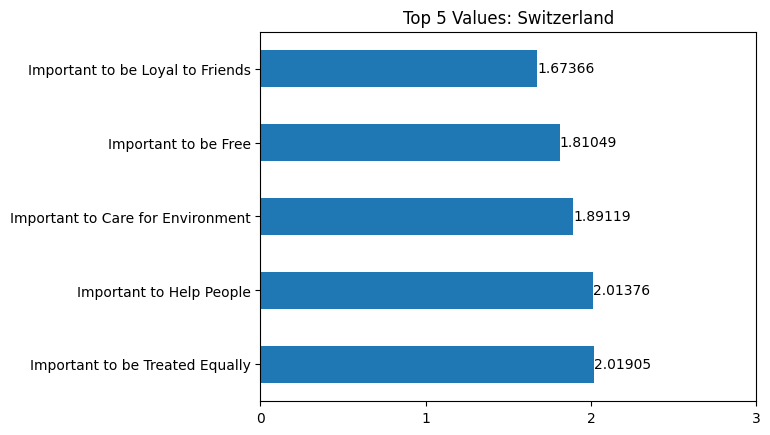

In [9]:
#Plot
ax = summ_stat_CH_df_top_5.plot.barh(title='Top 5 Values: Switzerland')
ax.invert_yaxis()
ax.set_xticks([0, 1, 2,3])
ax.bar_label(ax.containers[0])
plt.savefig('Images/Switzerland.png', bbox_inches='tight')
plt.show()

## Finland - Top 5 Values

In [10]:
summ_stat_FI = summ_stat.sort_values(by='FI', ascending=True)
summ_stat_FI_df = summ_stat_FI['FI']
summ_stat_FI_df_top_5 = summ_stat_FI_df.iloc[:5]
summ_stat_FI_df_top_5

Important to be Loyal to Friends            2.178559
Important to Care for Environment           2.323585
Important to be Treated Equally             2.355807
Important to be Free                        2.502621
Important to Understand Different People    2.519119
Name: FI, dtype: float64

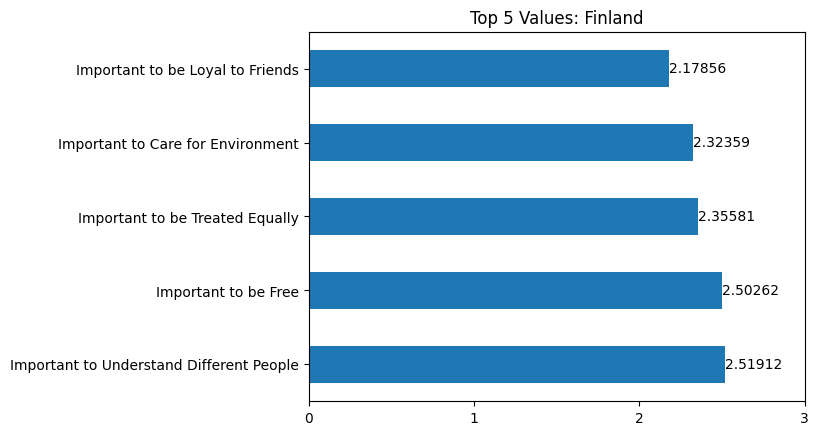

In [11]:
ax = summ_stat_FI_df_top_5.plot.barh(title='Top 5 Values: Finland')
ax.invert_yaxis()
ax.set_xticks([0, 1, 2,3])
ax.bar_label(ax.containers[0])
plt.savefig('Images/Finland.png', bbox_inches='tight')
plt.show()

## Great Britain- Top 5 Values

In [12]:
summ_stat_GB = summ_stat.sort_values(by='GB', ascending=True)
summ_stat_GB_df = summ_stat_GB['GB']
summ_stat_GB_df_top_5 = summ_stat_GB_df.iloc[:5]
summ_stat_GB_df_top_5

Important to be Loyal to Friends     1.961410
Important to Help People             2.061910
Important to be Treated Equally      2.166630
Important to be Free                 2.181011
Important to Care for Environment    2.239145
Name: GB, dtype: float64

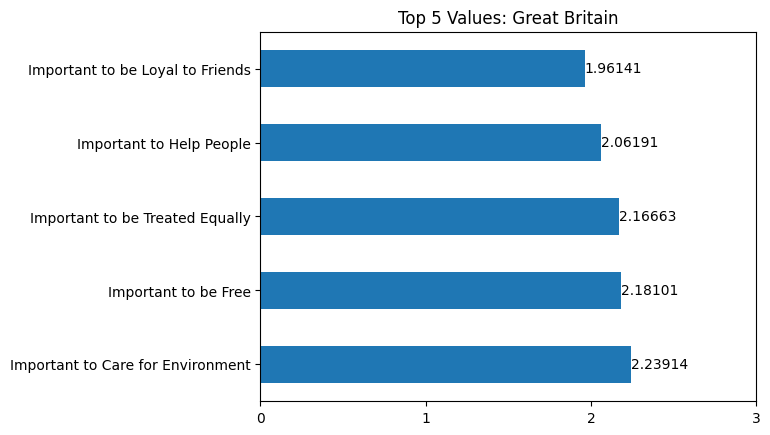

In [13]:
ax = summ_stat_GB_df_top_5.plot.barh(title='Top 5 Values: Great Britain')
ax.invert_yaxis()
ax.set_xticks([0, 1, 2,3])
ax.bar_label(ax.containers[0])
plt.savefig('Images/GB.png', bbox_inches='tight')
plt.show()

## Hungary - Top 5 Values

In [14]:
summ_stat_HU = summ_stat.sort_values(by='HU', ascending=True)
summ_stat_HU_df = summ_stat_HU['HU']
summ_stat_HU_df_top_5 = summ_stat_HU_df.iloc[:5]
summ_stat_HU_df_top_5

Important Live in Safe Surroundings                       2.144634
Important to Care for Environment                         2.210806
Important to be Loyal to Friends                          2.214223
Important that Government is Strong and Ensures Safety    2.362129
Important to be Treated Equally                           2.415721
Name: HU, dtype: float64

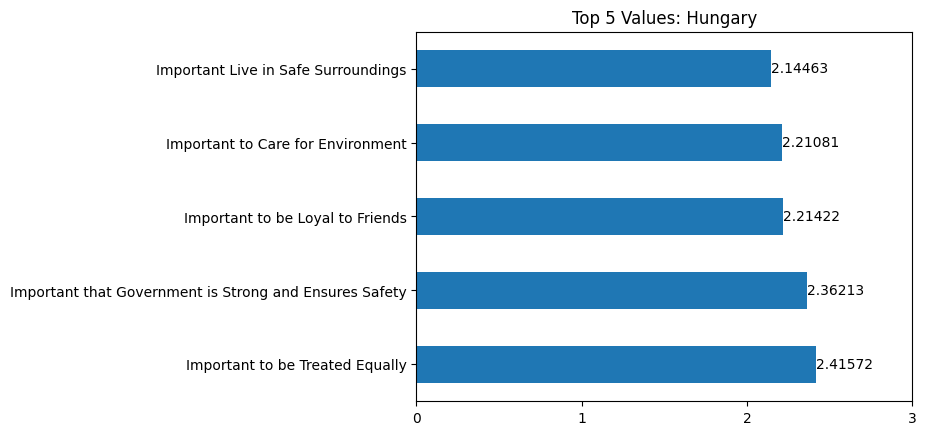

In [15]:
ax = summ_stat_HU_df_top_5.plot.barh(title='Top 5 Values: Hungary')
ax.invert_yaxis()
ax.set_xticks([0, 1, 2,3])
ax.bar_label(ax.containers[0])
plt.savefig('Images/Hungary.png', bbox_inches='tight')
plt.show()

## Switzerland Correlated Values

In [16]:
#Only Swizerland (CH)
data_CH = data_df9_clean.loc[data_df9_clean['country'] == 'CH']

#Drop string
data_CH_clean = data_CH.drop(['country'], axis=1)

#Perform correlation
data_CH_corr = data_CH_clean.corr(method='pearson')
dataCorr = data_CH_corr.mask(np.tril(np.ones(data_CH_corr.shape)).astype(np.bool))
dataCorr_New = dataCorr[abs(dataCorr) >= 0.5].stack().reset_index()
dataCorr_New.columns = ['Variable 1', 'Variable 2', 'R2 > 0.5']
dataCorr_New.sort_values(by='R2 > 0.5', ascending=False).head()

,Variable 1,Variable 2,R2 > 0.5
2,Trust_Politicians,Trust_Political_Parties,0.768365
3,Imp_Fun,Imp_Good_Time,0.535659
0,Gov_Satisfaction,Trust_Politicians,0.534697
1,Trust_Legal_System,Trust_Politicians,0.518192


In [17]:
#Output to csv
#data_CH_corr.to_csv("output_data/CH_corr.csv")

## Hungary Correlations

In [18]:
#Only Hungary (HU)
data_HU = data_df9_clean.loc[data_df9_clean['country'] == 'HU']

#Drop string "country"
data_HU_clean = data_HU.drop(['country'], axis=1)

#Perform correlation
data_HU_corr = data_HU_clean.corr(method='pearson')

#Dropping duplicate values
dataCorr_HU = data_HU_corr.mask(np.tril(np.ones(data_HU_corr.shape)).astype(np.bool))
dataCorr_HU_New = dataCorr_HU[abs(dataCorr_HU) >= 0.5].stack().reset_index()

#Renaming Columns
dataCorr_HU_New.columns = ['Variable 1', 'Variable 2', 'R2 > 0.5']

#Sort Descending by R2 value
dataCorr_HU_New.sort_values(by='R2 > 0.5', ascending=False).head()

,Variable 1,Variable 2,R2 > 0.5
28,Imp_Env,Imp_Loyal_Friends,0.812215
21,Imp_Env,Imp_Safe,0.769612
79,Imp_Safe,Imp_Loyal_Friends,0.764125
32,Imp_Env,Imp_Strong_Safe_Gov,0.748222
83,Imp_Safe,Imp_Strong_Safe_Gov,0.746245


In [19]:
#Output to csv
#data_HU_corr.to_csv("output_data/HU_corr.csv")

## Finland Correlations

In [20]:
#Only Finland (FI)
data_FI = data_df9_clean.loc[data_df9_clean['country'] == 'FI']

#Drop string
data_FI_clean = data_FI.drop(['country'], axis=1)

#Perform correlation
data_FI_corr = data_FI_clean.corr(method='pearson')

#Dropping duplicate values
dataCorr_FI = data_FI_corr.mask(np.tril(np.ones(data_FI_corr.shape)).astype(np.bool))
dataCorr_FI_New = dataCorr_FI[abs(dataCorr_FI) >= 0.5].stack().reset_index()

#Renaming Columns
dataCorr_FI_New.columns = ['Variable 1', 'Variable 2', 'R2 > 0.5']

#Sort Descending by R2 value
dataCorr_FI_New.sort_values(by='R2 > 0.5', ascending=False).head()

,Variable 1,Variable 2,R2 > 0.5
3,Trust_Politicians,Trust_Political_Parties,0.846762
133,Imp_Help_People,Imp_Loyal_Friends,0.807550
28,Imp_Env,Imp_Loyal_Friends,0.790455
139,Imp_Help_People,Imp_Understanding,0.783568
145,Imp_Loyal_Friends,Imp_Understanding,0.770735


In [21]:
#Output to csv
#data_FI_corr.to_csv("output_data/FI_corr.csv")

## Great Britain Correlations

In [22]:
#Only Great Britain (GB)
data_GB = data_df9_clean.loc[data_df9_clean['country'] == 'GB']

#Drop string
data_GB_clean = data_GB.drop(['country'], axis=1)

#Perform correlation
data_GB_corr = data_GB_clean.corr(method='pearson')

#Dropping duplicate values
dataCorr_GB = data_GB_corr.mask(np.tril(np.ones(data_GB_corr.shape)).astype(np.bool))
dataCorr_GB_New = dataCorr_GB[abs(dataCorr_GB) >= 0.5].stack().reset_index()

#Renaming Columns
dataCorr_GB_New.columns = ['Variable 1', 'Variable 2', 'R2 > 0.5']

#Sort Descending by R2 value
dataCorr_GB_New.sort_values(by='R2 > 0.5', ascending=False).head()

,Variable 1,Variable 2,R2 > 0.5
4,Trust_Politicians,Trust_Political_Parties,0.847861
8,Imp_Admired,Imp_Successful,0.587688
7,Imp_Help_People,Imp_Loyal_Friends,0.565242
0,Gov_Satisfaction,Trust_Politicians,0.556883
6,Imp_Fun,Imp_Good_Time,0.551356


In [23]:
#Output to csv
#data_GB_corr.to_csv("output_data/GB_corr.csv")